In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import jax.numpy as jnp
import math
import jax
import time
import sympy
from sympy import *
import pandas as pd
from numpy import random
import random

1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

---



Multiplication of the matrices A (n, k) and B (k, m), will result in a matrix, say C of the order (n, m).
$$C_{i, j} = \displaystyle\sum_{p=1}^k A_{i, p}.B_{p, j}$$\
This means that k multiplications are made for every element in C, and C has $$n \times m$$ elements. Therefore, the total number of multiplications made will be equal to $$k \times m \times n$$.

k - 1 additions are made for one element of C. Therefore, the total number of additions made will be equal to $$(k-1) \times m \times n$$.


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
# USING LIST OF LISTS

mat_a = [[2, 3, 4, 5], [5, 7, 0, 8], [10, 9, 0, 7]] #(3, 4) - (n, k)
mat_b = [[1, 9], [0, 0], [8, 6], [3, 4]] #(4, 2) - (k, m)
mat_c = []

n = len(mat_a)
k = len(mat_b)
m = len(mat_b[0])

begin = time.time()

for i in range(n):
  mat_c.append([])
for x in range(n):
  for y in range(m):
    el = 0
    for z in range(k):
      product = (mat_a[x][z])*(mat_b[z][y])
      el += product
    mat_c[x].append(el)

end = time.time()

print('A =', mat_a)
print('B =', mat_b)
print()
print('A X B =', mat_c)
print()
print('Time taken =', (end - begin))

A = [[2, 3, 4, 5], [5, 7, 0, 8], [10, 9, 0, 7]]
B = [[1, 9], [0, 0], [8, 6], [3, 4]]

A X B = [[49, 62], [29, 77], [31, 118]]

Time taken = 0.00017309188842773438


In [ ]:
# USING NUMPY

mat_a = np.array([[2, 3, 4, 5], [5, 7, 0, 8], [10, 9, 0, 7]]) #(3, 4) - (n, k)
mat_b = np.array([[1, 9], [0, 0], [8, 6], [3, 4]]) #(4, 2) - (k, m)

n = len(mat_a)
k = len(mat_b)
m = len(mat_b[0])

begin = time.time()

mat_c = np.dot(mat_a, mat_b)

end = time.time()

print('A =', mat_a)
print('B =', mat_b)
print()
print('A X B =', mat_c)
print()
print('Time taken =', (end-begin))

A = [[ 2  3  4  5]
 [ 5  7  0  8]
 [10  9  0  7]]
B = [[1 9]
 [0 0]
 [8 6]
 [3 4]]

A X B = [[ 49  62]
 [ 29  77]
 [ 31 118]]

Time taken = 0.00011014938354492188


It took 0.00017309188842773438 seconds to multiply two matrices using lists of lists and 0.00011014938354492188 seconds to do the same using numpy.

Using numpy is the faster way. Elements in numpy arrays are stored in contiguous memory locations, whereas those in lists are stored in non-contiguous locations, making operations on numpy arrays faster than those on lists. NumPy also integrates C, C++ and Fortran, not relying solely on Python. These languages are inherently faster than Python, making processes carried out using numpy faster.

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The first method uses a technique similar to bubble sort. The time complexity of this method is O(n^2) for an average case.

44 56 7 28 10 9 60 55 0 2

In [ ]:
l = list(map(int, (input()).split()))
ll = len(l)

begin = time.time()

n = ll//2 + 1
for x in range(n):
  for y in range(ll-x-1):
    if l[y]>l[y+1]:
      l[y], l[y+1] = l[y+1], l[y]
print('Median = ', end = '')
if ll%2==0:
  print((l[ll//2-1]+l[ll//2])/2)
else:
  print(l[ll//2])

end = time.time()

print('\nTime taken using this method =', (end-begin))

44 56 7 28 10 9 60 55 0 2
Median = 19.0

Time taken using this method = 0.001149892807006836


The second method uses the quick select algorithm which has a time complexity of O(n) for an average case.

In [ ]:
l = list(map(int, (input()).split()))
ll = len(l)

def partition(ls, begin, end):
  i = begin
  j = end-1
  pivot = ls[end]
  while i<j:
    while i<end and ls[i]<pivot:
      i+=1
    while j>begin and ls[j]>pivot:
      j-=1
    if i<j:
      ls[i], ls[j] = ls[j], ls[i]
  if ls[i]>pivot:
    ls[i], ls[end]=ls[end], ls[i]
  return i

def quick_select(ls, begin, end, k):
  if begin<end:
    marker = partition(ls, begin, end)
    if marker==(k-1):
      return ls[marker]
    elif marker<(k-1):
      return quick_select(ls, marker+1, end, k)
    else:
      return quick_select(ls, begin, marker-1, k)
  elif begin==end:
    return ls[begin]

beginn = time.time()

print('Median = ', end = '')
if ll%2==0:
  a = quick_select(l, 0, ll-1, ll//2)
  b = quick_select(l, 0, ll-1, ll//2+1)
  print((a+b)/2)
else:
  print(quick_select(l, 0, ll-1, ll//2+1))

endd = time.time()

print('\nTime taken using this method =', (endd-beginn))

44 56 7 28 10 9 60 55 0 2
Median = 19.0

Time taken using this method = 0.000457763671875


In [ ]:
l = list(map(int, (input()).split()))
arr = np.array(l)

begin = time.time()

print('Median = ', end = '')
print(np.median(arr))

end = time.time()

print('\nTime taken using this method =', (end-begin))

44 56 7 28 10 9 60 55 0 2
Median = 19.0

Time taken using this method = 0.008048057556152344


Time taken:

first method: 0.001150 seconds

second method: 0.000457 seconds

using numpy.median: 0.008048

Though both methods have the same time complexity in the worst-case scenarios, the quick select method is significantly better in most cases making it the better method.

4. What is the gradient of the following function with respect to x and y?
$$x^2y+y^3\sin(x)$$


The gradient of a function f(x, y) is calculated as:
$$grad f(x, y) = \frac {\partial f} {\partial x} i + \frac {\partial f} {\partial y} j$$
$$f(x, y) = x^2y+y^3\sin(x)$$
$$\frac {\partial f} {\partial x} = 2xy + y^3\cos(x)$$
$$\frac {\partial f} {\partial y} = x^2+3y^2\sin(x)$$
$$\therefore grad f(x, y) = (2xy + y^3\cos(x))i+(x^2+3y^2\sin(x))j$$

Considering a few random values of x and y:

$$x = 2, y = 5$$
$$\nabla f(2, 5) = (2(2)(5) + (5)^3\cos(5))i + ((2)^2+3 (5)^2\sin(2))j$$

$$\therefore \nabla f(2, 5) = -32.0125i+72.1975j$$

$$x = 5, y = 2$$
$$\nabla f(5, 2) = (2(5)(2) + (2)^3\cos(5))i + ((5)^2+3 (2)^2\sin(5))j$$

$$\therefore \nabla f(5, 2) = 22.2696i+13.4932j$$

$$x = 1, y = 1$$
$$\nabla f(1, 1) = (2(1)(1) + (1)^3\cos(1))i + ((1)^2+3 (1)^2\sin(1))j$$

$$\therefore \nabla f(1, 1) = 2.5403i+3.5245j$$

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [ ]:
def print_grad(p, q):
  p = float(p)
  q = float(q)
  f = lambda x, y: y*(x**2) + (y**3)*(jnp.sin(x))
  gri = jax.grad(f, 0)
  a = gri(p, q)
  grj = jax.grad(f, 1)
  b = grj(p, q)
  print(a, 'i +', b, 'j')

print_grad(2, 5)
print_grad(5, 2)
print_grad(1, 1)

-32.018356 i + 72.1973 j
22.269299 i + 13.4929085 j
2.5403023 i + 3.5244129 j


This shows that the values calculated using jax match those calculated analytically. There is a slight difference in the values owing to the difference in precision of the sine and cosine values used.

6. Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
x, y = symbols('x, y')
expr = x**2*y + y**3*sin(x)
print('Gradient of f = ', end = '')
gri = diff(expr, x)
grj = diff(expr, y)
print('('+str(gri)+') i+ ('+str(grj)+') j')

Gradient of f = (2*x*y + y**3*cos(x)) i+ (x**2 + 3*y**2*sin(x)) j


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:



1.   2022
   1.   Branch 1
      1. Roll Number: 1, Name: N, Marks:
         1.   Maths: 100, English: 70 …
   2. Branch 2
2.   2023
   1.   Branch 1
   2.   Branch 2
3.   2024
   1.   Branch 1
   2.   Branch 2
4.   2025
   1.   Branch 1
   2.   Branch 2


In [ ]:
recs = {2022:{'Branch 1':{1:{'Name':N, 'Marks':{'Maths':100, 'English':70, 'Hindi':85, 'Science':96}},
                          2:{'Name':M, 'Marks':{'Maths':80, 'English':70, 'Hindi':95, 'Science':100}},
                          3:{'Name':A, 'Marks':{'Maths':50, 'English':90, 'Hindi':65, 'Science':60}}},
              'Branch 2': {1:{'Name':B, 'Marks':{'Maths':90, 'English':75, 'Hindi':90, 'Science':100}},
                          2:{'Name':C, 'Marks':{'Maths':80, 'English':66, 'Hindi':95, 'Science':100}},
                          3:{'Name':D, 'Marks':{'Maths':75, 'English':100, 'Hindi':80, 'Science':100}}}},
        2023:{'Branch 1':{1:{'Name':E, 'Marks':{'Maths':100, 'English':70, 'Hindi':85, 'Science':96}},
                          2:{'Name':F, 'Marks':{'Maths':80, 'English':70, 'Hindi':95, 'Science':100}},
                          3:{'Name':G, 'Marks':{'Maths':50, 'English':90, 'Hindi':65, 'Science':60}}},
              'Branch 2': {1:{'Name':H, 'Marks':{'Maths':90, 'English':75, 'Hindi':90, 'Science':100}},
                          2:{'Name':I, 'Marks':{'Maths':80, 'English':66, 'Hindi':95, 'Science':100}},
                          3:{'Name':J, 'Marks':{'Maths':75, 'English':100, 'Hindi':80, 'Science':100}}}},
        2024:{'Branch 1':{1:{'Name':K, 'Marks':{'Maths':100, 'English':70, 'Hindi':85, 'Science':96}},
                          2:{'Name':L, 'Marks':{'Maths':80, 'English':70, 'Hindi':95, 'Science':100}},
                          3:{'Name':O, 'Marks':{'Maths':50, 'English':90, 'Hindi':65, 'Science':60}}},
              'Branch 2': {1:{'Name':P, 'Marks':{'Maths':90, 'English':75, 'Hindi':90, 'Science':100}},
                          2:{'Name':Q, 'Marks':{'Maths':80, 'English':66, 'Hindi':95, 'Science':100}},
                          3:{'Name':R, 'Marks':{'Maths':75, 'English':100, 'Hindi':80, 'Science':100}}}},
        2025:{'Branch 1':{1:{'Name':S, 'Marks':{'Maths':100, 'English':70, 'Hindi':85, 'Science':96}},
                          2:{'Name':T, 'Marks':{'Maths':80, 'English':70, 'Hindi':95, 'Science':100}},
                          3:{'Name':U, 'Marks':{'Maths':50, 'English':90, 'Hindi':65, 'Science':60}}},
              'Branch 2': {1:{'Name':V, 'Marks':{'Maths':90, 'English':75, 'Hindi':90, 'Science':100}},
                          2:{'Name':W, 'Marks':{'Maths':80, 'English':66, 'Hindi':95, 'Science':100}},
                          3:{'Name':X, 'Marks':{'Maths':75, 'English':100, 'Hindi':80, 'Science':100}}}}}

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$$1. y=x$$
$$2. y = x^2$$
$$3. y=\frac {x^3} {100}$$
$$4. y=\sin(x)$$
$$5. y=\frac{\sin(x)} x$$
$$6. y=\log(x)$$
$$7. y=e^x$$

In [ ]:
x = np.linspace(0.5, 100.0, 200)

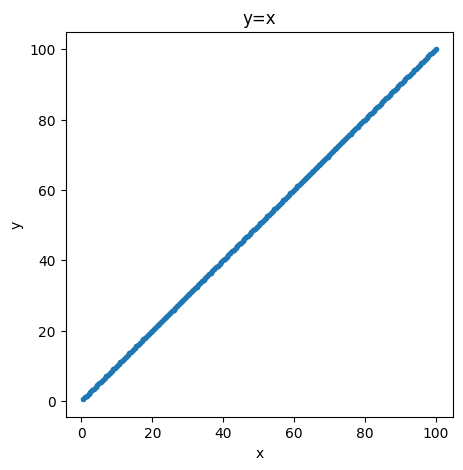

In [ ]:
y = x
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=x')
plt.show()

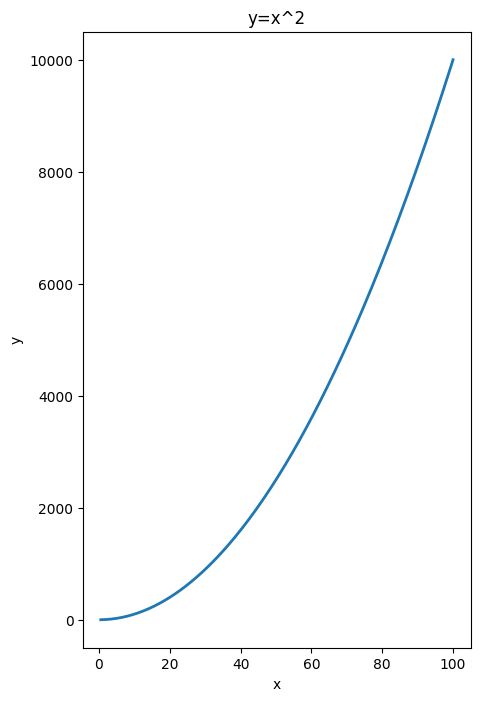

In [ ]:
y = x*x
fig = plt.figure(figsize = (5, 8))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=x^2')
plt.show()

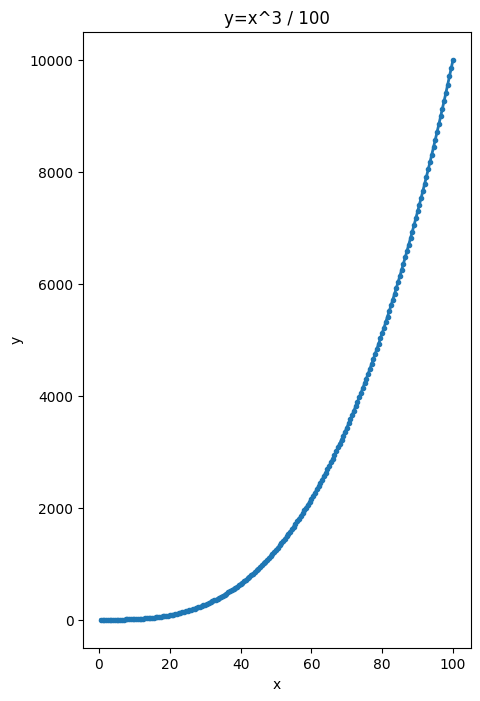

In [ ]:
y = (x*x*x)/100
fig = plt.figure(figsize = (5, 8))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=x^3 / 100')
plt.show()

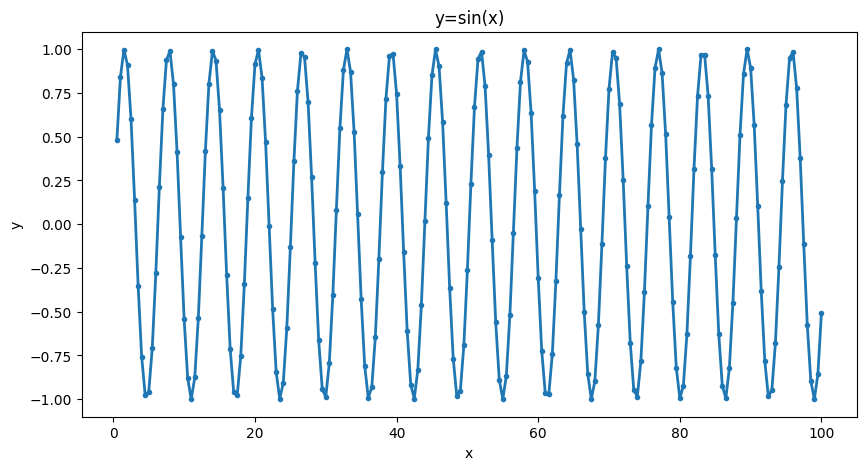

In [ ]:
y = np.sin(x)
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=sin(x)')
plt.show()

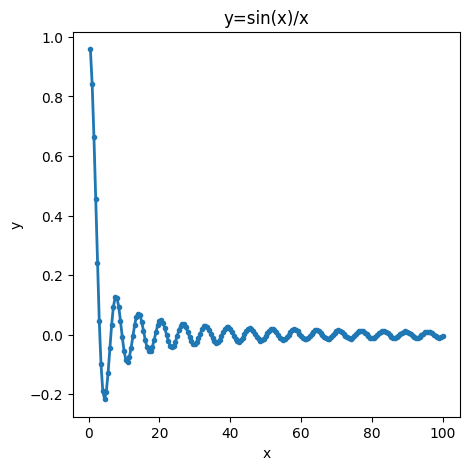

In [ ]:
y = (np.sin(x))/x
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=sin(x)/x')
plt.show()

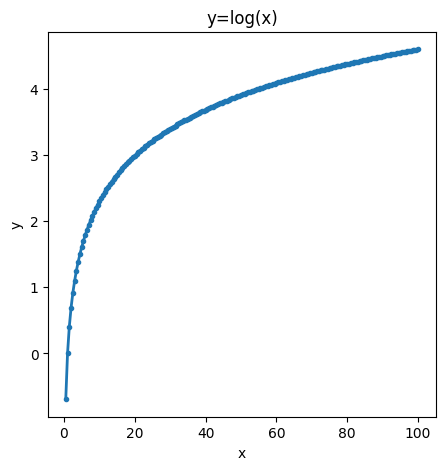

In [ ]:
y = np.log(x)
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=log(x)')
plt.show()

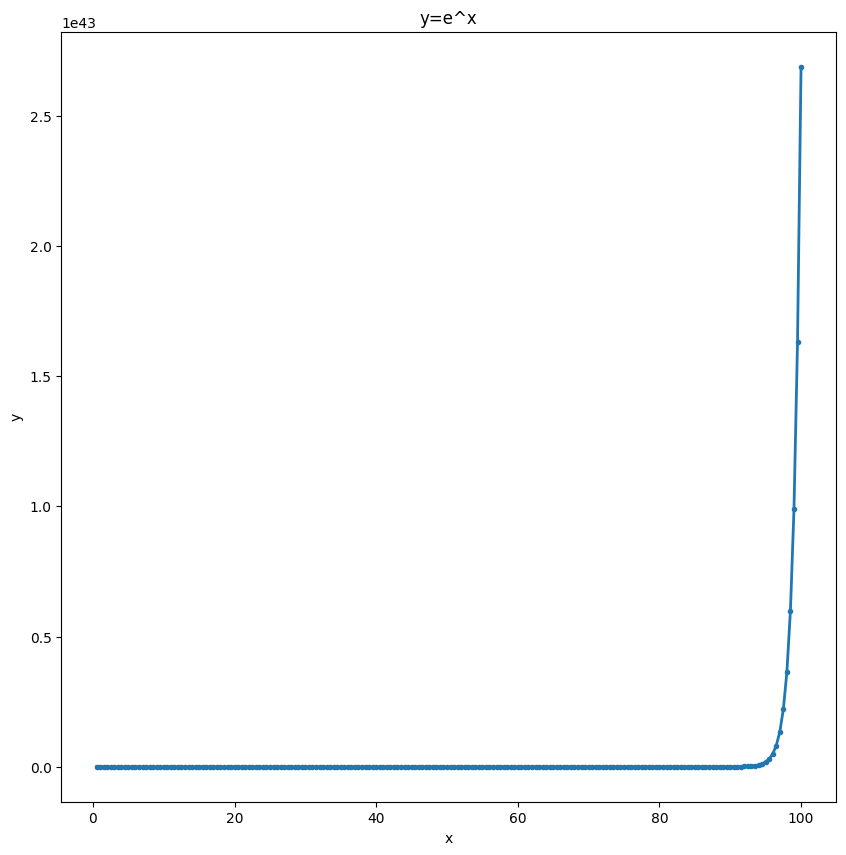

In [ ]:
y = np.exp(x)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 2, marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=e^x')
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [4]:
arr = np.empty((20, 5))
for x in range(20):
  for y in range(5):
    arr[x, y] = np.random.uniform(1, 2)
cols = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(arr, columns = cols)
sd = 0
colsd = ''
for col in cols:
  if df[col].std() > sd:
    sd = df[col].std()
    colsd = col
print(f'The column with the highest standard deviation is {colsd} with a standard deviation of {sd}.')
print()
m = 5
colm = ''
for col in cols:
  if df[col].mean() < m:
    m = df[col].mean()
    colm = col
print(f'The column with the lowest mean is {colm} with a standard deviation of {m}.')

The column with the highest standard deviation is e with a standard deviation of 0.31257361126768285.

The column with the lowest mean is a with a standard deviation of 1.399175618848308.


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [6]:
x = df['a']+df['b']+df['c']+df['d']+df['e']
df.insert(5, 'f', x)
g = []
for i in df['f']:
  if i<8:
    g.append('LT8')
  else:
    g.append('GT8')
df.insert(6, 'g', g)
print(df)

           a         b         c         d         e         f    g
0   1.224550  1.110309  1.668053  1.364709  1.423208  6.790830  LT8
1   1.114475  1.917800  1.483585  1.751511  1.463730  7.731102  LT8
2   1.503821  1.660254  1.514165  1.152137  1.945218  7.775595  LT8
3   1.634671  1.061632  1.897833  1.842980  1.952235  8.389351  GT8
4   1.616222  1.043029  1.753108  1.217034  1.682928  7.312321  LT8
5   1.247661  1.479441  1.821532  1.729064  1.639671  7.917370  LT8
6   1.195435  1.806074  1.215476  1.533101  1.530593  7.280678  LT8
7   1.718704  1.610038  1.572338  1.156224  1.585958  7.643262  LT8
8   1.825296  1.554242  1.743719  1.762482  1.064032  7.949771  LT8
9   1.603846  1.648314  1.776130  1.807047  1.520293  8.355629  GT8
10  1.543935  1.969003  1.725810  1.320416  1.188587  7.747751  LT8
11  1.057749  1.675054  1.845842  1.732679  1.933742  8.245066  GT8
12  1.082754  1.032313  1.268289  1.001208  1.025991  5.410556  LT8
13  1.018703  1.226602  1.003553  1.272779  1.43

In [7]:
print('LT8 is the value in column g in', df['g'].value_counts()['LT8'], 'rows.')

LT8 is the value in column g in 17 rows.


In [8]:
df1 = df[df['g']=='LT8']
df2 = df[df['g']=='GT8']
print('For the rows with LT8 in column g, the standard deviation of column f is', df1['f'].std())
print('For the rows with GT8 in column g, the standard deviation of column f is', df2['f'].std())

For the rows with LT8 in column g, the standard deviation of column f is 0.6910405613790754
For the rows with GT8 in column g, the standard deviation of column f is 0.07547549011757534


12. Write a small piece of code to explain broadcasting in numpy.

There are three examples in the following code that explain the three rules of broadcasting in numpy.

In [ ]:
matrix = np.array([[1, 2, 3], [0, 0, 9], [5, 6, 4]])
a = np.array([2, 4, 3])
b = np.array([[2, 4, 3], [2, 4, 3], [2, 4, 3]])
p = np.array([[1], [4], [6]])
q = np.array([[1, 1, 1], [4, 4, 4], [6, 6, 6]])
x = np.array([3])
y = np.array([[3, 3, 3], [3, 3, 3], [3, 3, 3]])

print(matrix+x)
print(matrix+y)
print()
print(matrix+a)
print(matrix+b)
print()
print(matrix+p)
print(matrix+q)

[[ 4  5  6]
 [ 3  3 12]
 [ 8  9  7]]
[[ 4  5  6]
 [ 3  3 12]
 [ 8  9  7]]

[[ 3  6  6]
 [ 2  4 12]
 [ 7 10  7]]
[[ 3  6  6]
 [ 2  4 12]
 [ 7 10  7]]

[[ 2  3  4]
 [ 4  4 13]
 [11 12 10]]
[[ 2  3  4]
 [ 4  4 13]
 [11 12 10]]


Here, a 3X3 matrix was considered.

The first case shows that
$$\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix}+\begin{bmatrix}
   3
\end{bmatrix}$$
gives the same result as$$
\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix} + \begin{bmatrix}
   3 & 3 & 3 \\
   3 & 3 & 3 \\
   3 & 3 & 3 \\
\end{bmatrix}$$

The second case shows that
$$\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix}+\begin{bmatrix}
   2 & 4 & 3
\end{bmatrix}$$
gives the same result as$$
\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix} + \begin{bmatrix}
   2 & 4 & 3 \\
   2 & 4 & 3 \\
   2 & 4 & 3 \\
\end{bmatrix}$$

The third case shows that
$$\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix}+\begin{bmatrix}
   1\\
   4\\
   6
\end{bmatrix}$$
gives the same result as$$
\begin{bmatrix}
   1 & 2 & 3 \\
   0 & 0 & 9 \\
   5 & 6 & 4 \\
\end{bmatrix} + \begin{bmatrix}
   1 & 1 & 1 \\
   4 & 4 & 4 \\
   6 & 6 & 6 \\
\end{bmatrix}$$



13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
x = int(input('Enter number of rows in array: '))
y = int(input('Enter number of columns in array: '))
print('Enter the rows of the array as rows of space-separated numbers.')
n = []
for i in range(x):
  l = list(map(int, (input()).split()))
  n.append(l)
arr = np.array(n)
min_pos_x = 0
min_pos_y = 0
minn = 100000000000
for i in range(x):
  for j in range(y):
    if arr[i, j]<minn:
      minn = arr[i, j]
      min_pos_x = i
      min_pos_y = j
print('Index of minimum element:')
print(min_pos_x*y + min_pos_y) #to get the result as it would be if array was flattened as is don by np.argmin
print(np.argmin(arr))

Enter number of rows in array: 4
Enter number of columns in array: 3
Enter the rows of the array as rows of space-separated numbers.
12 45 89
56 88 90
14 5 46
16 88 24
Index of minimum element:
7
7


In [ ]:
np.argmin()

9 8 44 67
33 90 12 27
32 56 14 2

References

[1] “LaTeX Cheat Sheet & Quick Reference,” *QuickRef.ME*. https://quickref.me/latex (accessed Aug. 03, 2024).

[2]Khan Academy, “Directional derivative,” *YouTube*. May 12, 2016. Accessed: Aug. 04, 2024. [Online]. Available: https://www.youtube.com/watch?v=N_ZRcLheNv0

[3]Khan Academy, “Gradient and graphs,” *YouTube*. May 12, 2016. Accessed: Aug. 04, 2024. [Online]. Available: https://www.youtube.com/watch?v=_-02ze7tf08

[4]Khan Academy, “Gradient,” *YouTube*. May 23, 2016. Accessed: Aug. 04, 2024. [Online]. Available: https://www.youtube.com/watch?v=tIpKfDc295M

[5]“Calculus - SymPy 1.11 documentation,” *docs.sympy.org*. https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html (accessed Aug. 04, 2024).

[6]K. Willems, “Pandas Cheat Sheet,” *Data Camp*, May 2021. https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python (accessed Aug. 05, 2024).

[7]“numpy.argmin — NumPy v2.0 Manual,” *Numpy.org*, 2024. https://numpy.org/doc/stable/reference/generated/numpy.argmin.html#numpy-argmin (accessed Aug. 05, 2024).

